# Chương trình huấn luyện và đánh giá độ chính xác model

In [1]:
import argparse
import pandas as pd
import numpy as np
import mylib.data_preprocessing as dpp

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import np_utils, plot_model
from keras.models import load_model

from keras import optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU

from enum import Enum
import matplotlib.pyplot as plt
from keras.callbacks import Callback, ModelCheckpoint
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/thanhdat/anaconda3/envs/py3.6a/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/thanhdat

In [8]:
raw_data = pd.read_csv('skeleton_data/train_16.csv', header=0)
dataset = raw_data.values
X = dataset[:, 0:20].astype(float)
Y = dataset[:, 20]
dataset.shape

(12800, 21)

In [3]:
raw_data

,joints[0]_x,joints[0]_y,joints[1]_x,joints[1]_y,joints[2]_x,joints[2]_y,joints[3]_x,joints[3]_y,joints[4]_x,joints[4]_y,...,joints[5]_y,joints[6]_x,joints[6]_y,joints[7]_x,joints[7]_y,joints[8]_x,joints[8]_y,joints[11]_x,joints[11]_y,class
0,0.537037,0.195652,0.518519,0.347826,0.444444,0.326087,0.314815,0.304348,0.407407,0.195652,...,0.347826,0.648148,0.500000,0.592593,0.608696,0.462963,0.652174,0.574074,0.652174,0
1,0.537037,0.195652,0.518519,0.347826,0.444444,0.326087,0.314815,0.304348,0.407407,0.195652,...,0.347826,0.648148,0.521739,0.592593,0.608696,0.481481,0.630435,0.574074,0.652174,0
2,0.537037,0.195652,0.518519,0.347826,0.425926,0.326087,0.314815,0.304348,0.407407,0.195652,...,0.347826,0.648148,0.521739,0.611111,0.630435,0.462963,0.652174,0.574074,0.652174,0
3,0.537037,0.195652,0.518519,0.347826,0.444444,0.326087,0.314815,0.304348,0.407407,0.195652,...,0.347826,0.629630,0.521739,0.611111,0.652174,0.481481,0.630435,0.574074,0.652174,0
4,0.537037,0.195652,0.518519,0.347826,0.444444,0.326087,0.314815,0.304348,0.407407,0.195652,...,0.347826,0.629630,0.521739,0.611111,0.673913,0.481481,0.630435,0.574074,0.652174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12795,0.587963,0.092391,0.578704,0.271739,0.467593,0.260870,0.518519,0.369565,0.629630,0.440217,...,0.282609,0.703704,0.407609,0.555556,0.298913,0.509259,0.695652,0.662037,0.706522,15
12796,0.587963,0.092391,0.574074,0.271739,0.467593,0.260870,0.504630,0.358696,0.625000,0.429348,...,0.288043,0.708333,0.413043,0.550926,0.298913,0.504630,0.695652,0.657407,0.711957,15
12797,0.587963,0.092391,0.578704,0.277174,0.472222,0.260870,0.481481,0.347826,0.620370,0.423913,...,0.288043,0.717593,0.418478,0.550926,0.304348,0.504630,0.695652,0.662037,0.706522,15
12798,0.587963,0.092391,0.578704,0.271739,0.476852,0.255435,0.486111,0.353261,0.620370,0.429348,...,0.288043,0.722222,0.418478,0.550926,0.309783,0.513889,0.701087,0.657407,0.701087,15


# Pose visualize

In [3]:
print(X[0])
print(X[0][0])
for i in range(X.shape[0]):
    for n in range(20):
        if (n%2) == 0:
            X[i][n] = X[i][n] * 720
        else:
            X[i][n] = X[i][n] * 640

[0.53703704 0.19565217 0.51851852 0.34782609 0.44444444 0.32608696
 0.31481481 0.30434783 0.40740741 0.19565217 0.61111111 0.34782609
 0.64814815 0.5        0.59259259 0.60869565 0.46296296 0.65217391
 0.57407407 0.65217391]
0.537037037


float64


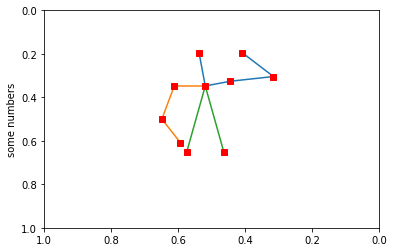

In [4]:
a = X[0]
print(a[0].dtype)
plt.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]])
plt.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]])
plt.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]])

plt.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs')

plt.axis([1, 0, 1, 0])
plt.ylabel('some numbers')
plt.show()

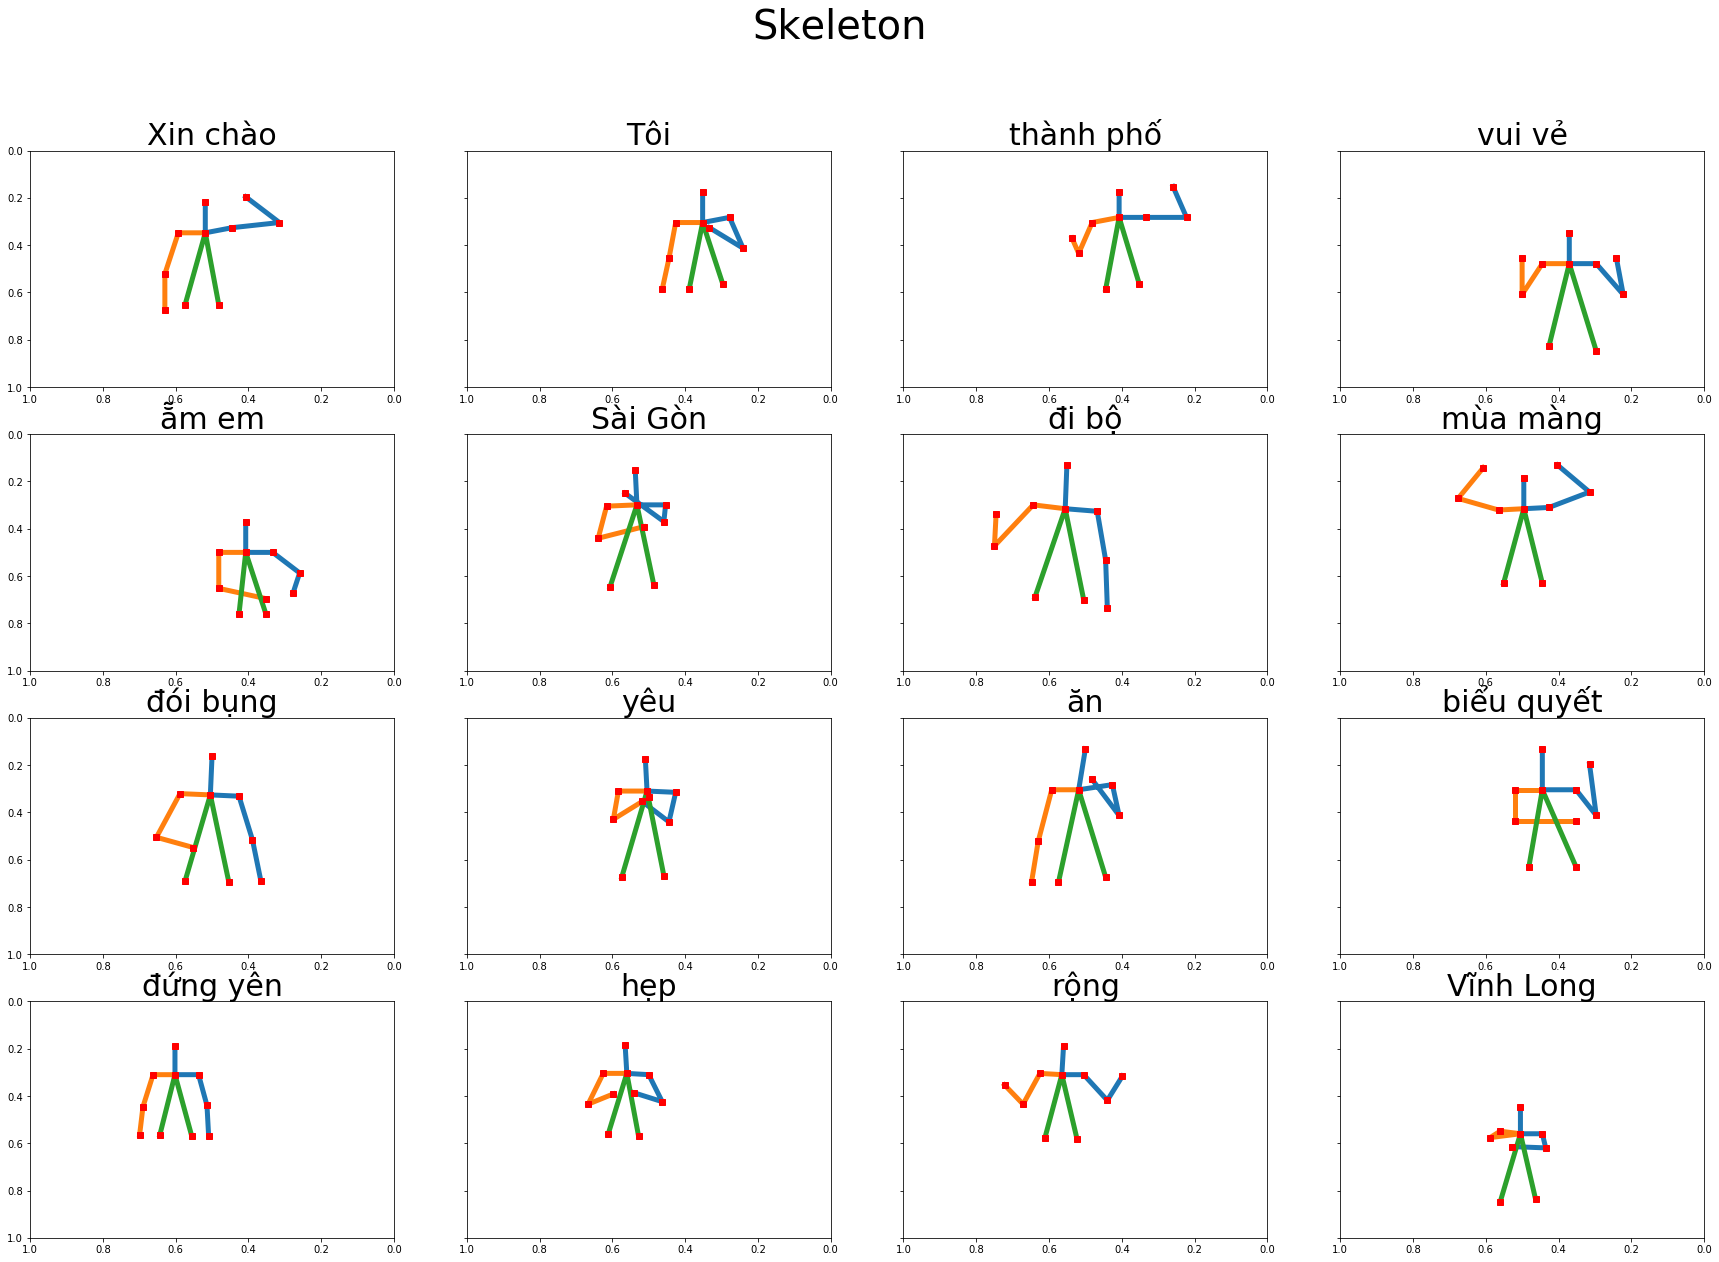

In [4]:
# Plot skeleton
df = pd.read_csv('skeleton_data/train_16.csv')
df.set_index('class', inplace=True)
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False,
                             sharey=True, figsize=(30,20))
fig.suptitle('Skeleton', size=40)
n = 0
for x in range(4):
    for y in range(4):
        a = list(df.iloc[n*800+10])
        axes[x,y].set_title(class_names[n], size=30)
        axes[x,y].plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]], linewidth=5)
        axes[x,y].plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]], linewidth=5)
        axes[x,y].plot([a[16],a[2],a[18]], [a[17],a[3],a[19]], linewidth=5)
        axes[x,y].plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', )
        axes[x,y].axis([1, 0, 1, 0])
        n+=1
plt.show()

[0.537037037, 0.1956521739, 0.5185185185, 0.347826087, 0.44444444439999997, 0.32608695649999997, 0.3148148148, 0.3043478261, 0.40740740740000003, 0.1956521739, 0.6111111111, 0.347826087, 0.6481481481, 0.5, 0.5925925926, 0.6086956522, 0.46296296299999995, 0.6521739129999999, 0.5740740741, 0.6521739129999999]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996, 331.851851872, 469.56521735999996]


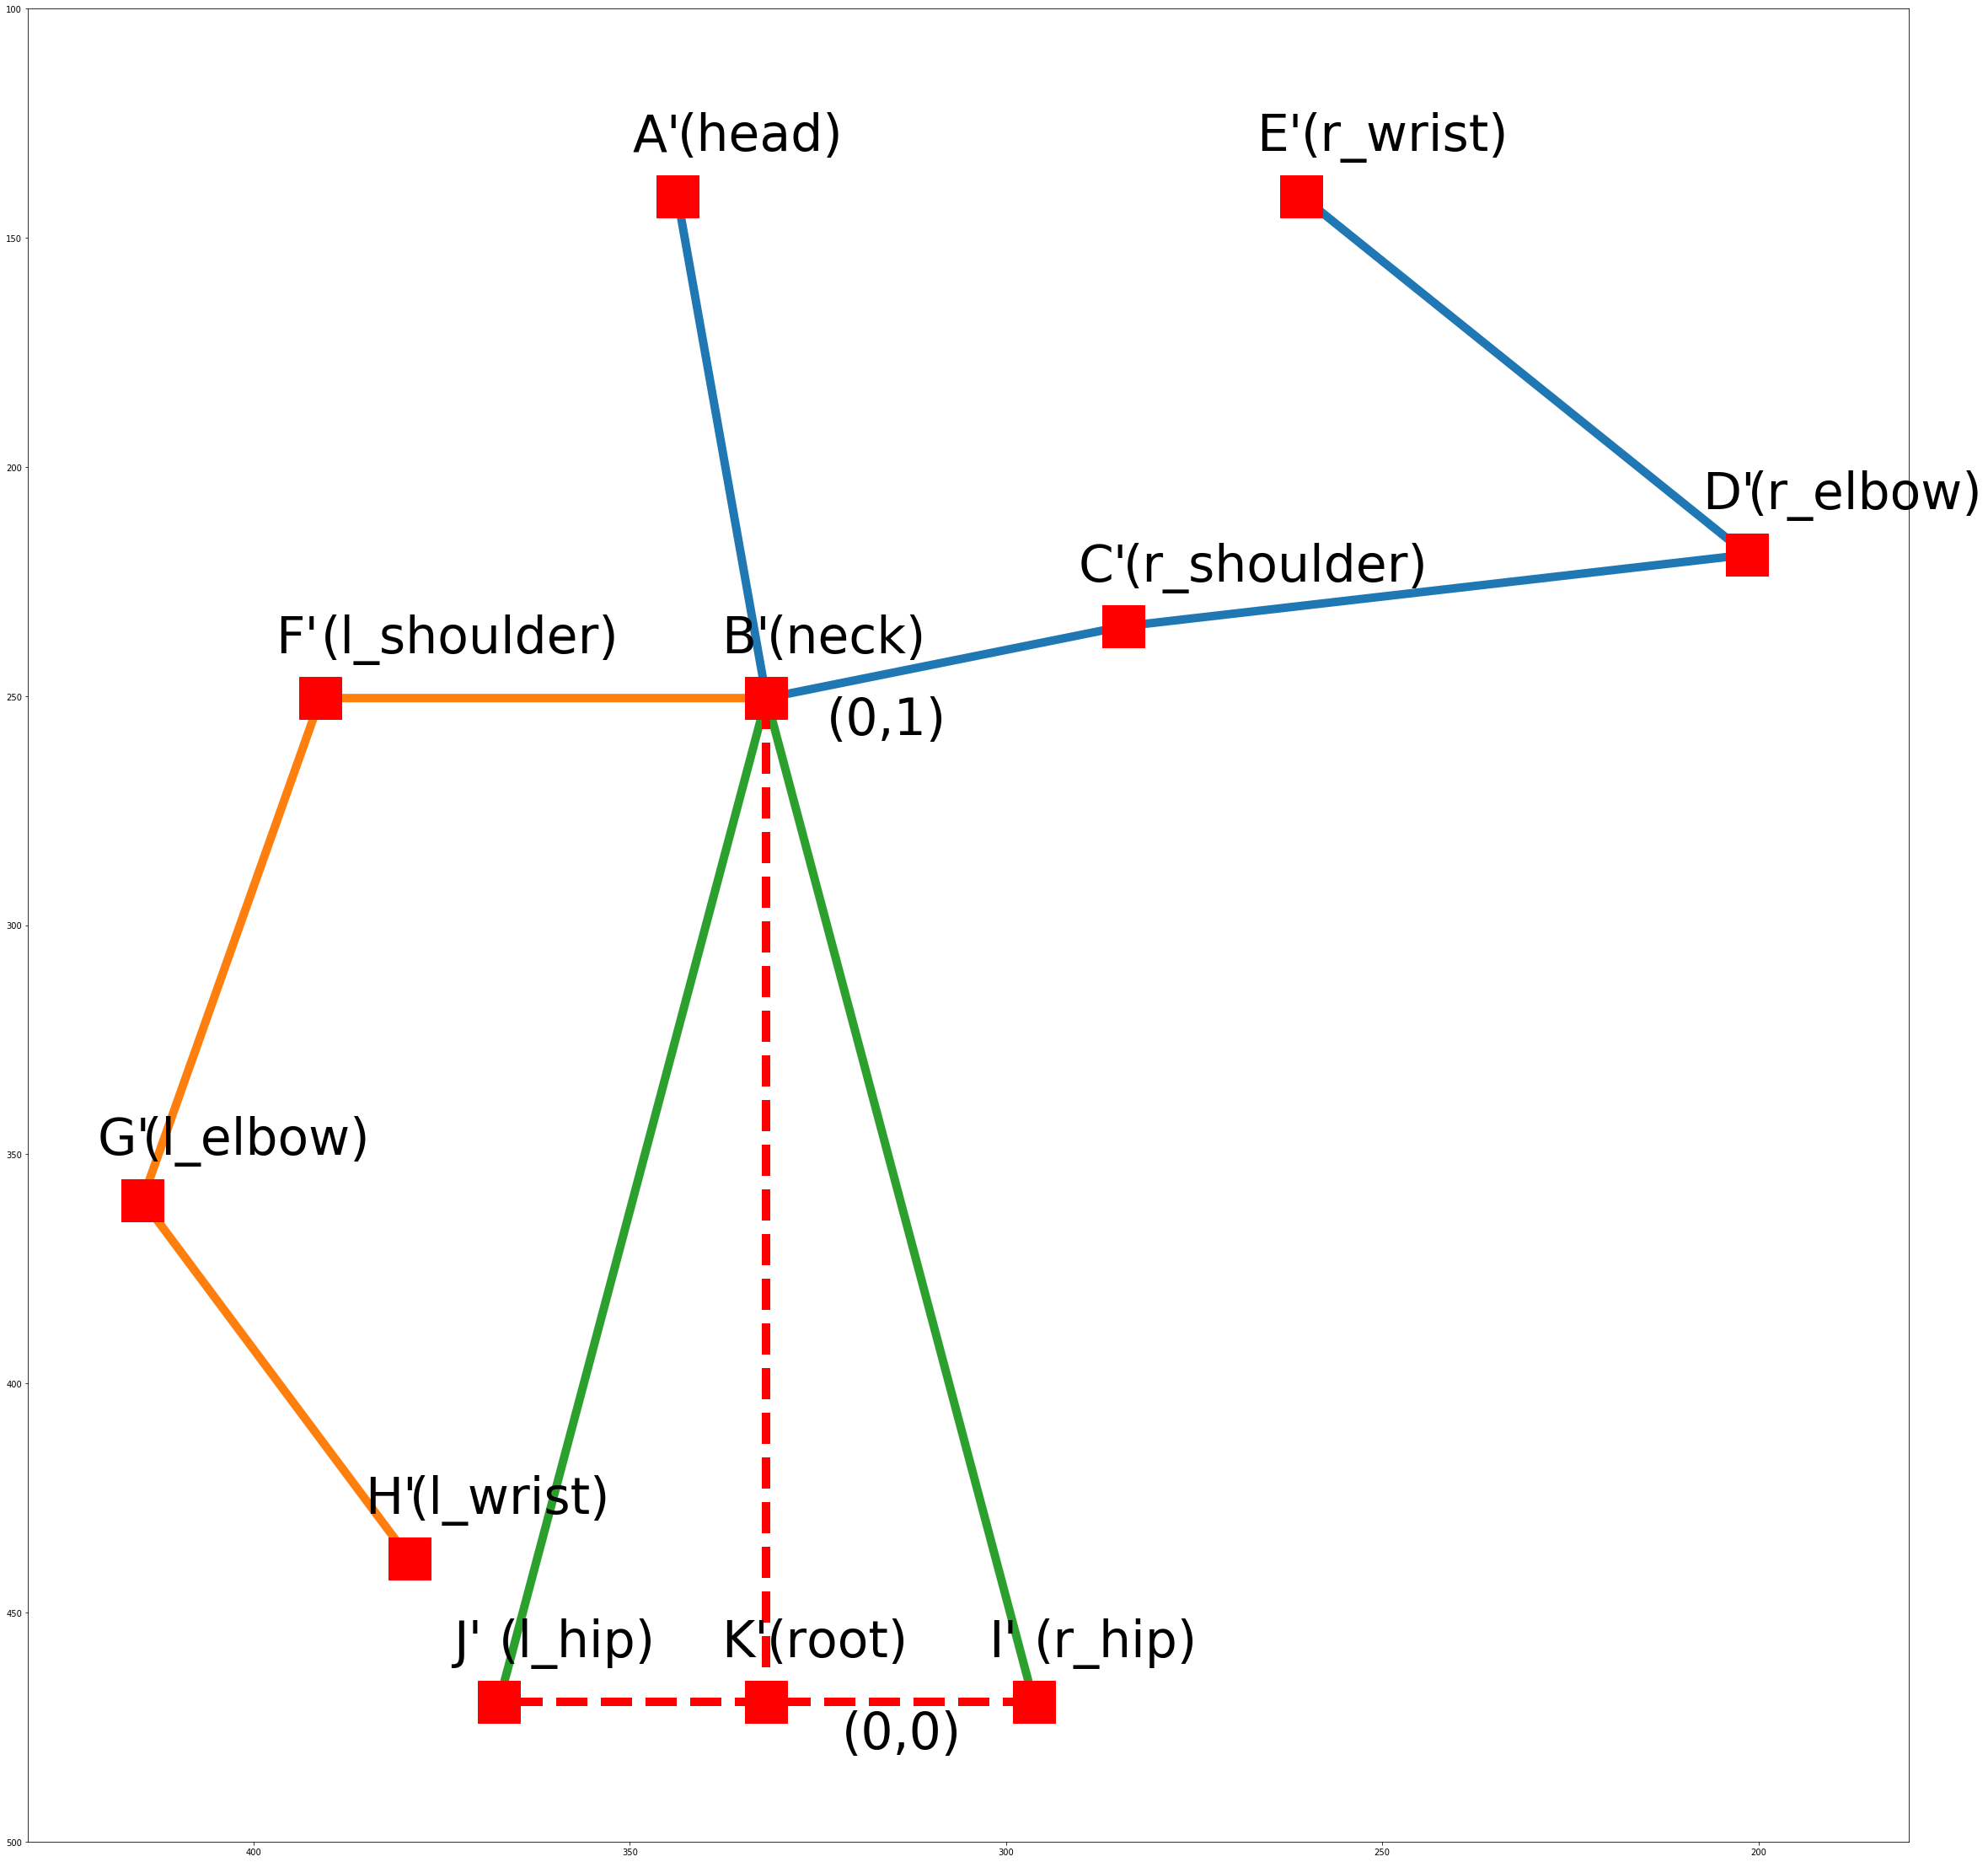

In [5]:
X = dataset[:, 0:20].astype(float)
a = list(X[0])
print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])
        
    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
a.append((a[16]+a[18])/2)
a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=10)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=10)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=10)
axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()

axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18], a[20]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19], a[21]], 'rs', markersize=50)
for i, txt in enumerate(name):
    axes.text(joints_y[i], joints_x[i]-10, '('+txt+')', fontsize=60)
for i, txt in enumerate(name_2):
    axes.text(joints_y[i]+6, joints_x[i]-10, txt, fontsize=60)

axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=60)
axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=60)
axes.axis([430, 180, 500, 100]) #axes.axis([640, 0, 720, 0])
plt.show()


[0.537037037, 0.1956521739, 0.5185185185, 0.347826087, 0.44444444439999997, 0.32608695649999997, 0.3148148148, 0.3043478261, 0.40740740740000003, 0.1956521739, 0.6111111111, 0.347826087, 0.6481481481, 0.5, 0.5925925926, 0.6086956522, 0.46296296299999995, 0.6521739129999999, 0.5740740741, 0.6521739129999999]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996]
[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996]


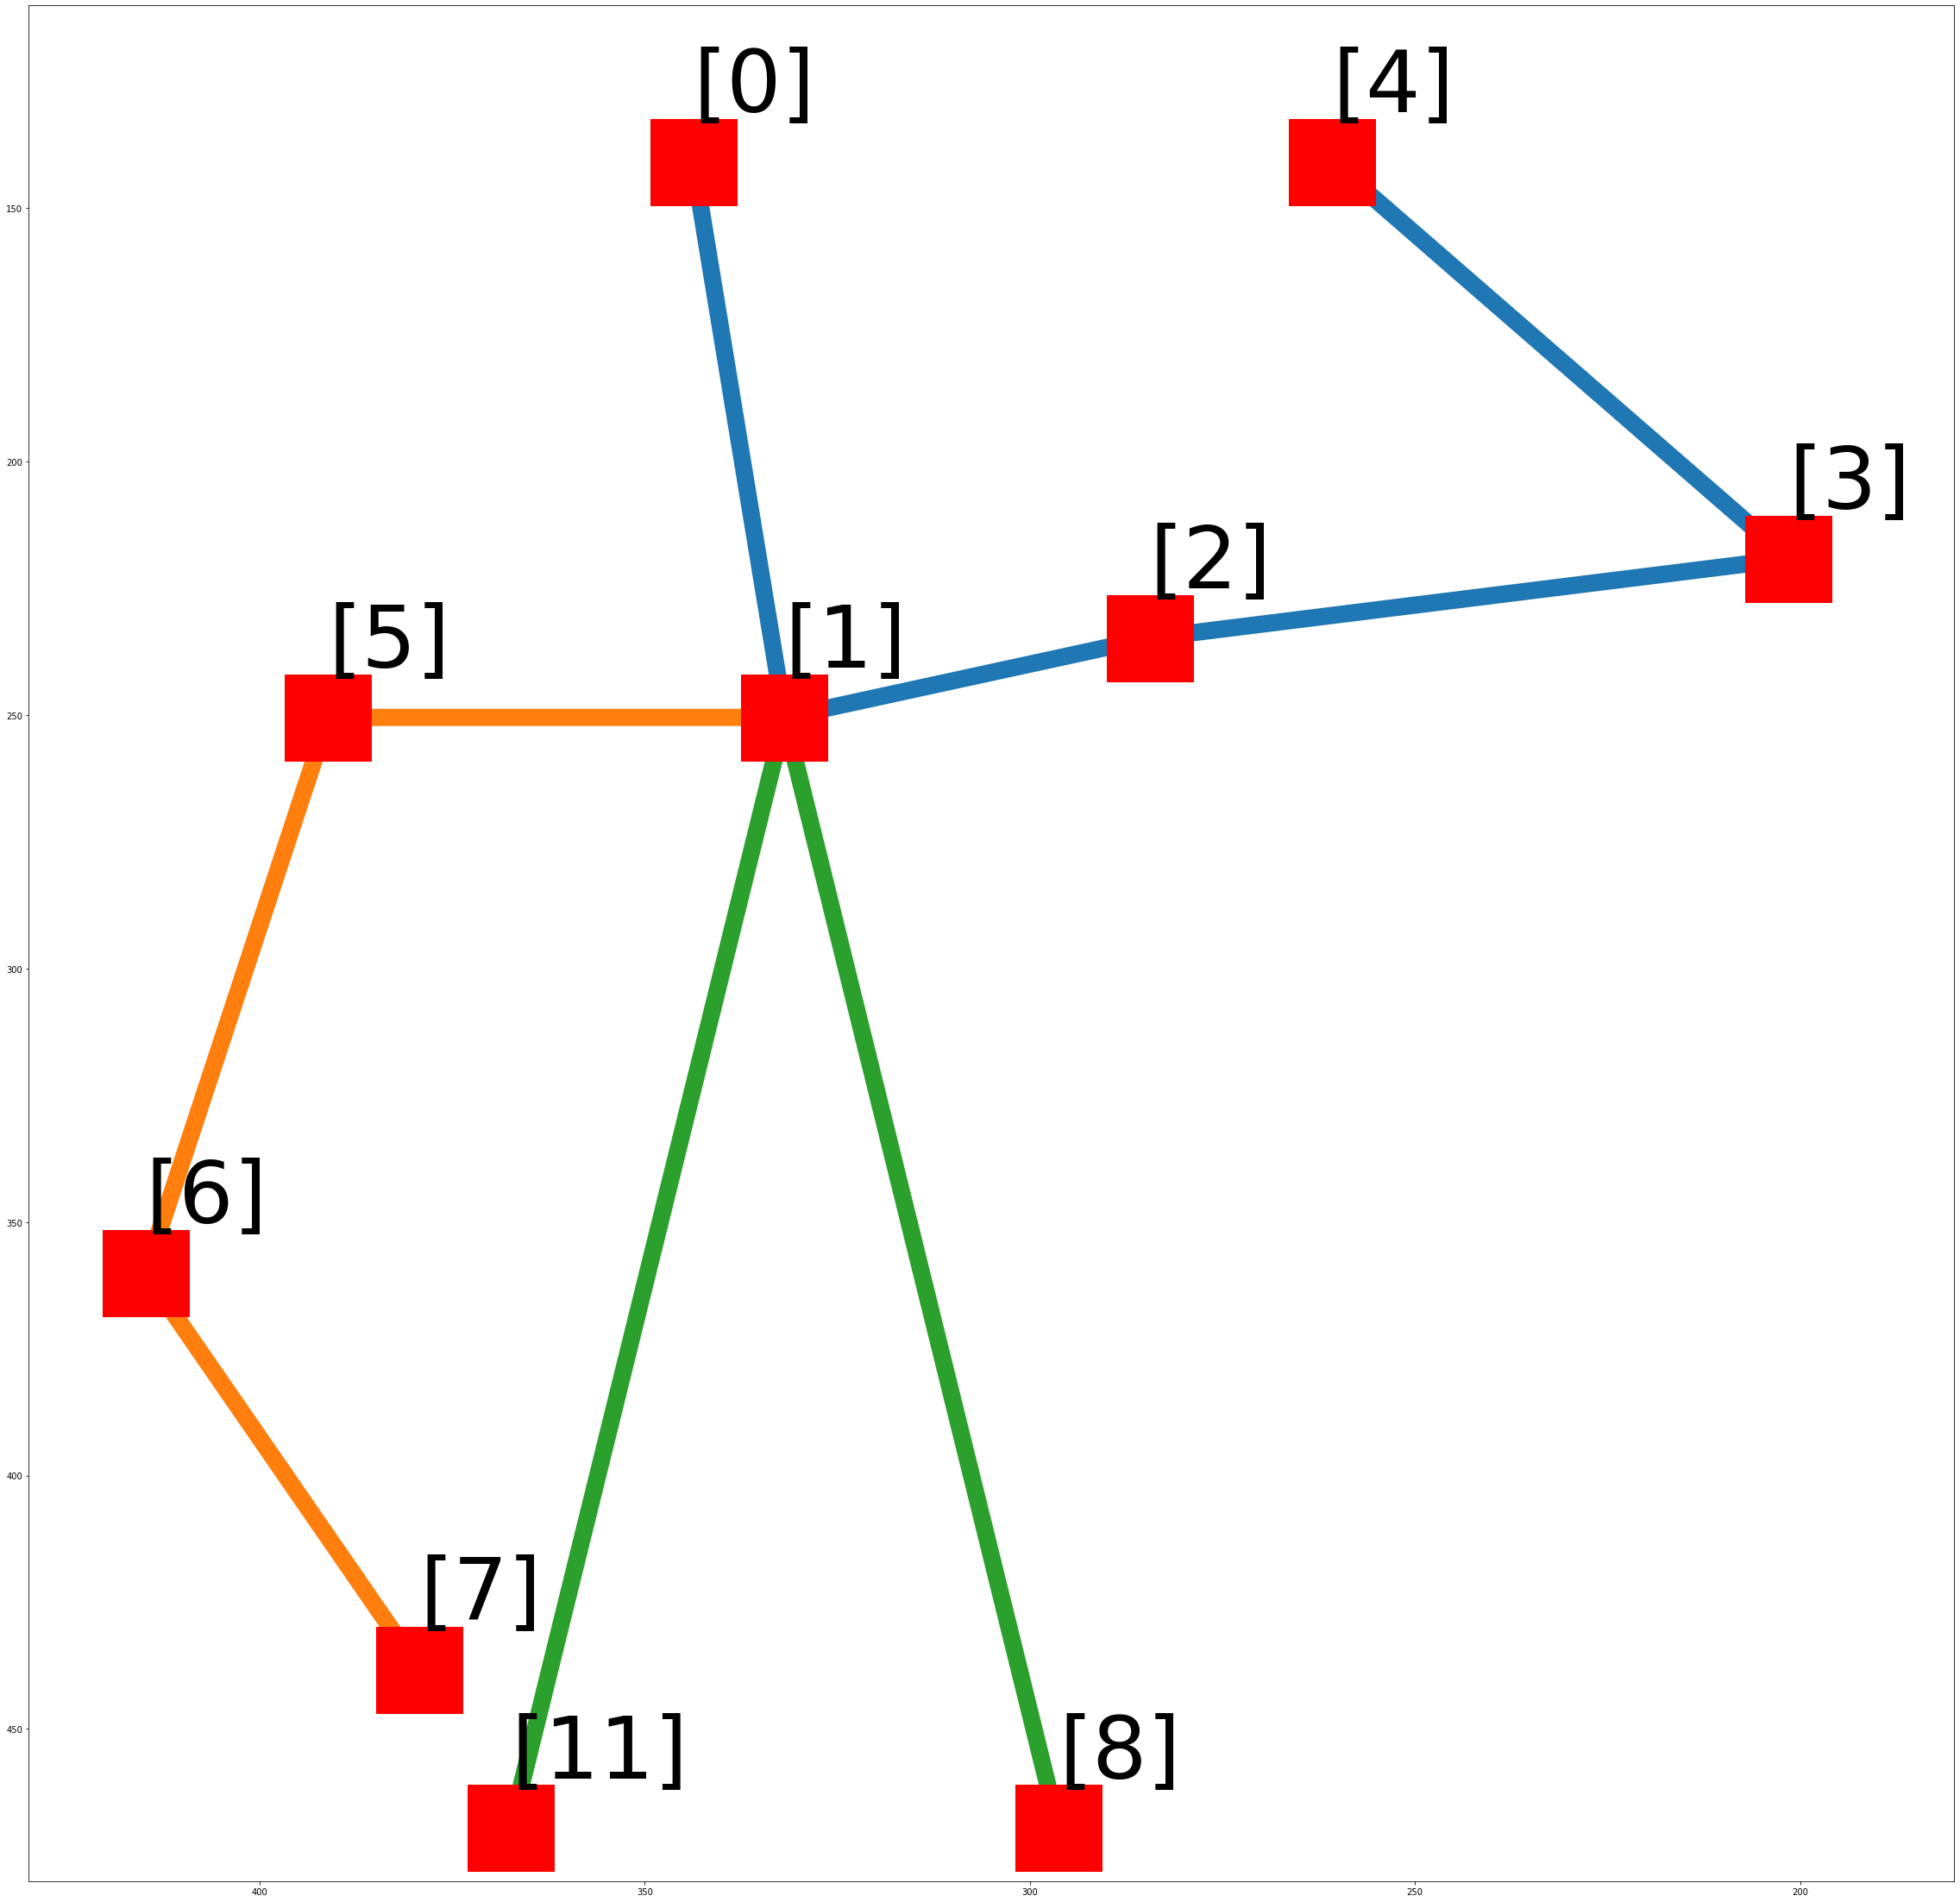

In [12]:
X = dataset[:, 0:20].astype(float)
a = list(X[0])
print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])
        
    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = min(joints_y)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()

axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([430, 180, 480, 110]) #axes.axis([640, 0, 720, 0])
plt.show()


[343.70370368000005, 140.869565208, 331.85185184, 250.43478264, 284.444444416, 234.78260867999998, 201.481481472, 219.130434792, 260.740740736, 140.869565208, 391.11111110400003, 250.43478264, 414.81481478399996, 360.0, 379.259259264, 438.260869584, 296.29629631999995, 469.56521735999996, 367.407407424, 469.56521735999996]
toa do:  (140.869565208, 201.481481472, 469.56521735999996, 414.81481478399996)


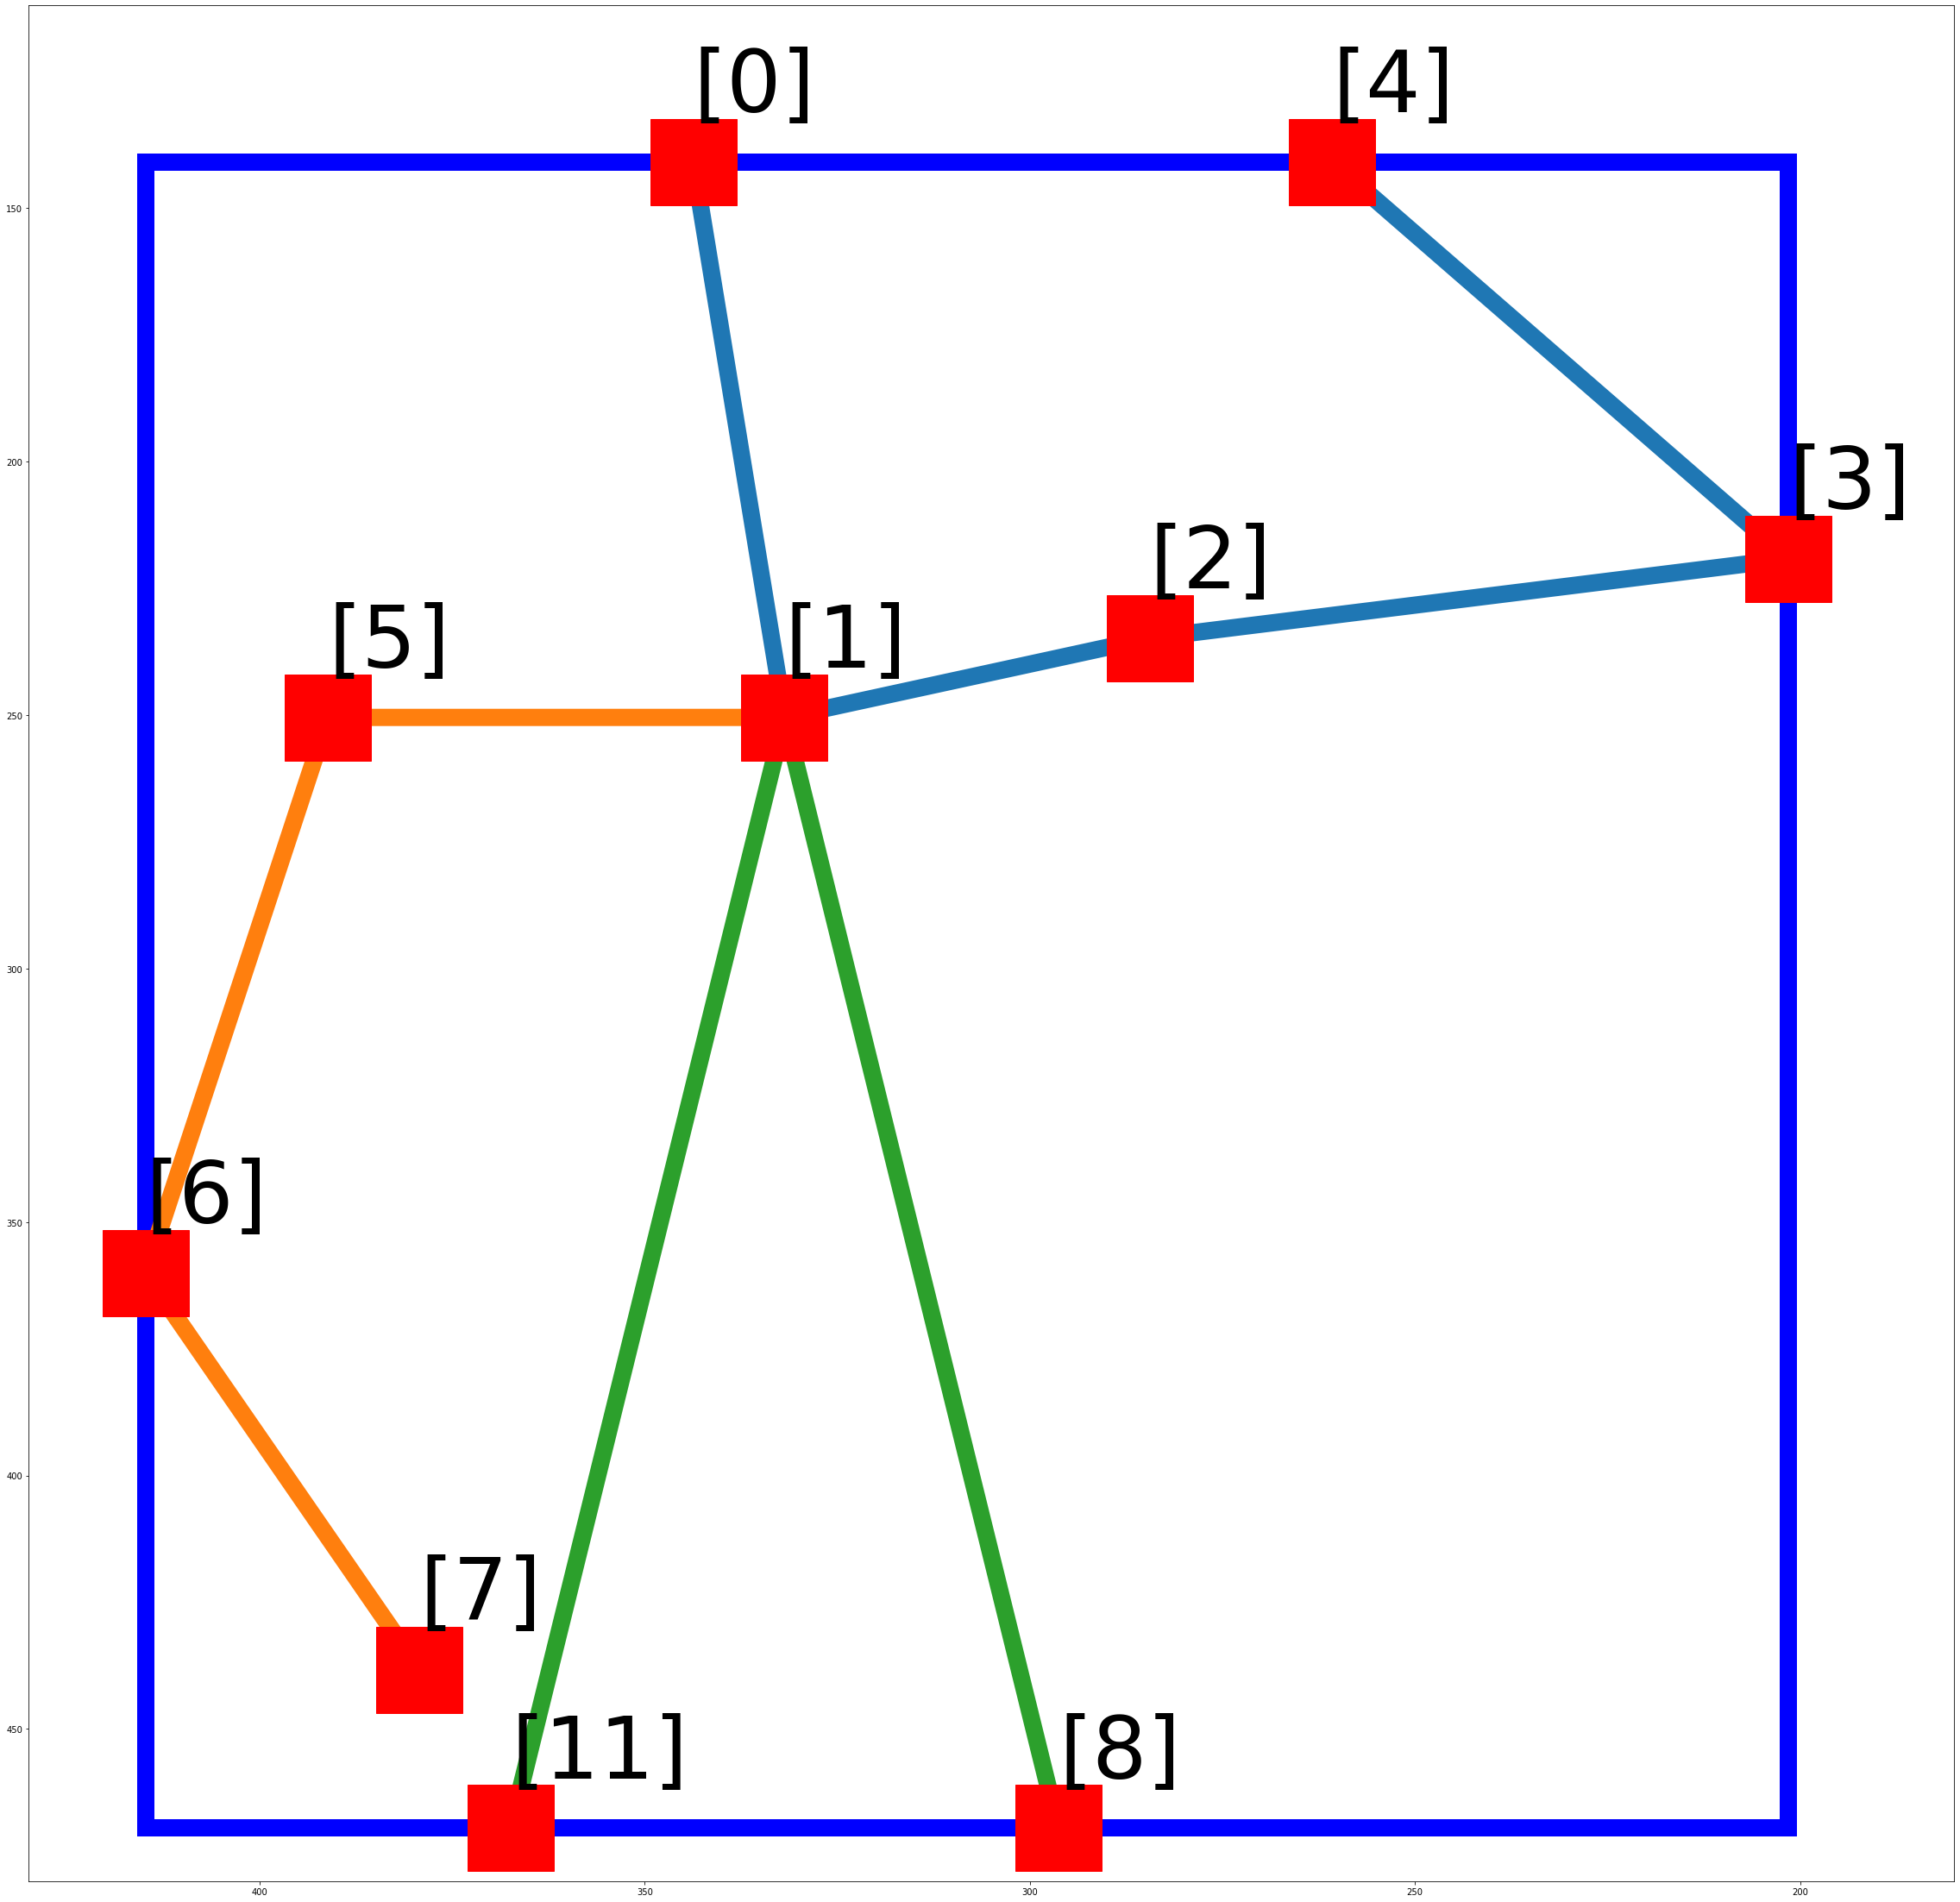

In [36]:
import matplotlib.patches as patches
X = dataset[:, 0:20].astype(float)
a = list(X[0])
#print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])
        
    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
#print(a)
joints_y.append((a[16]+a[18])/2)
joints_x.append((a[17]+a[19])/2)
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = max(joints_y)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)

tamgiac = patches.Rectangle((miny, minx), maxy - miny, maxx - minx,linewidth=20,edgecolor='b',facecolor='none')
axes.add_patch(tamgiac)
#plt.Rectangle((minx, miny),maxx - minx, maxy - miny, fill=True, edgecolor=(0.4,0,0.3), linewidth=40)#
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()
print('toa do: ',(minx, miny, maxx, maxy))
axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([430, 180, 480, 110]) #axes.axis([640, 0, 720, 0])
plt.show()

In [53]:
import matplotlib.patches as patches
X = dataset[:, 0:20].astype(float)
a = list(X[0])
#print(a)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = a[i]*720
        joints_x.append(a[i])
        
    else:
        a[i] = a[i]*640
        joints_y.append(a[i])
#print(a)
#joints_y.append((a[16]+a[18])/2)
#joints_x.append((a[17]+a[19])/2)
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = max(joints_y)
joints_x = []
joints_y = []
for i in range(len(a)):
    if (i%2) !=0:
        a[i] = (a[i]-minx)/(maxx-minx)
        joints_x.append(a[i])
        
    else:
        a[i] = (a[i]-miny)/(maxy-miny)
        joints_y.append(a[i])
minx = min(joints_x)
miny = min(joints_y)
maxx = max(joints_x)
maxy = max(joints_y)
#a.append((a[16]+a[18])/2)
#a.append((a[17]+a[19])/2)
print(a)
name = ['head', 'neck', 'r_shoulder', 'r_elbow','r_wrist','l_shoulder','l_elbow', 'l_wrist', 'r_hip', 'l_hip', 'root_spine']
name_1 = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
name_2 = ["A'", "B'", "C'", "D'", "E'", "F'", "G'", "H'", "I'", "J'", "K'"]
name_3 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '11']
m_x = (joints_x[8] + joints_x[9])/2
m_y = (joints_y[8] + joints_y[9])/2
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=False,
                             sharey=True, figsize=(40,40))
#fig.suptitle('Skeleton', size=80)
#axes.scatter(joints_x, joints_y)
axes.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]],linewidth=20)
axes.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]],linewidth=20)
axes.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]],linewidth=20)

hcn = patches.Rectangle((miny, minx), maxy - miny, maxx - minx,linewidth=50,edgecolor='b',facecolor='none')
axes.add_patch(hcn)
#plt.Rectangle((minx, miny),maxx - minx, maxy - miny, fill=True, edgecolor=(0.4,0,0.3), linewidth=40)#
# axes.plot([a[16],a[20],a[18]], [a[17],a[21],a[19]],'r--', linewidth=10)
# axes.plot([a[2],a[20]], [a[3],a[21]],'r--', linewidth=10)
#axes.plot.()
print('toa do: ',(minx, miny, maxx, maxy))
axes.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]],
          [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', markersize=100)
for i, txt in enumerate(name_3):
    axes.text(joints_y[i], joints_x[i]-10, "["+txt+"]", fontsize=100)

# axes.text(joints_y[1]-8, joints_x[1]+8, "(0,1)", fontsize=40)
# axes.text(joints_y[10]-10, joints_x[10]+10, "(0,0)", fontsize=40)
axes.axis([1, 0, 1, 0]) #axes.axis([640, 0, 720, 0])
plt.show()

[0.666666666666667, 0.0, 0.6111111111611112, 0.3333333334793651, 0.38888888883888895, 0.28571428571428564, 0.0, 0.23809523816825393, 0.2777777778277779, 0.0, 0.8888888889888892, 0.3333333334793651, 1.0, 0.6666666667396826, 0.8333333334833334, 0.9047619049079365, 0.44444444464444427, 1.0, 0.7777777779777778, 1.0]
toa do:  (0.0, 0.0, 1.0, 1.0)


In [ ]:
a = X[0]
print(a[0].dtype)
plt.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]])
plt.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]])
plt.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]])

plt.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs')

plt.axis([1, 0, 1, 0])
plt.ylabel('some numbers')
plt.show()

# Normalize dữ liệu

In [32]:
#Test
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
     11, 12, 13, 14, 15, 16, 17, 18,
     19, 20, 21, 22, 23, 24, 25, 26,
     27, 28, 29, 30, 31, 32, 33, 34, 35]
x0 = x[2:2+13*2]
print('x0: ',x0)


lx = []
ly = []
N =  26 #len(x_input)
i = 0
while i<N:
    lx.append(x0[i])
    ly.append(x0[i+1])
    i+=2
lx = np.array(lx)
ly = np.array(ly)
non_zero_x = lx
non_zero_y = ly
print('non_zero_x', non_zero_x)
print('non_zero_y', non_zero_y)

# Normalization x/y data according to the bounding box
origin_x = np.min(non_zero_x)
origin_y = np.min(non_zero_y)
print(origin_x)
print(origin_y)
len_x = np.max(non_zero_x) - np.min(non_zero_x)
len_y = np.max(non_zero_y) - np.min(non_zero_y)
print('len_x: ', len_x)
print('len_y: ', len_y)

x0:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
non_zero_x [ 2  4  6  8 10 12 14 16 18 20 22 24 26]
non_zero_y [ 3  5  7  9 11 13 15 17 19 21 23 25 27]
2
3
len_x:  24
len_y:  24


In [25]:
#Test
def normalize(x_input):
    # Separate original data into x_list and y_list
    lx = []
    ly = []
    N = len(x_input) #26
    i = 0
    while i<N:
        lx.append(x_input[i])
        ly.append(x_input[i+1])
        i+=2
    lx = np.array(lx)
    ly = np.array(ly)

    # Get rid of undetected data (=0)
    non_zero_x = []
    non_zero_y = []
    for i in range(int(N/2)):
        if lx[i] != 0:
            non_zero_x.append(lx[i])
        if ly[i] != 0:
            non_zero_y.append(ly[i])
    if len(non_zero_x) == 0 or len(non_zero_y) == 0:
        return np.array([0] * N)

    # Normalization x/y data according to the bounding box
    origin_x = np.min(non_zero_x)
    origin_y = np.min(non_zero_y)
    len_x = np.max(non_zero_x) - np.min(non_zero_x)
    len_y = np.max(non_zero_y) - np.min(non_zero_y)
    x_new = []
    for i in range(int(N/2)):
        if (lx[i] + ly[i]) == 0:
            x_new.append(-1)
            x_new.append(-1)
        else:
            x_new.append((lx[i] - origin_x) / len_x)
            x_new.append((ly[i] - origin_y) / len_y)
    return x_new
kq = normalize(x0)
print(len(kq))

26


## Bắt đầu normalize

In [41]:
X_pp = []
for i in range(len(X)):
    X_pp.append(dpp.pose_normalization_20(X[i]))
X_pp = np.array(X_pp)
print('X_pp.shape: ', X_pp.shape)

X_pp.shape:  (12800, 20)


float64


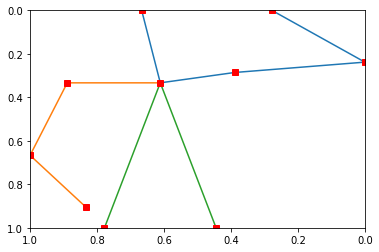

In [42]:
a = X_pp[0]
print(a[0].dtype)
plt.plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]])
plt.plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]])
plt.plot([a[16],a[2],a[18]], [a[17],a[3],a[19]])

plt.plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs')

plt.axis([1, 0, 1, 0])
#plt.ylabel('some numbers')
plt.show()

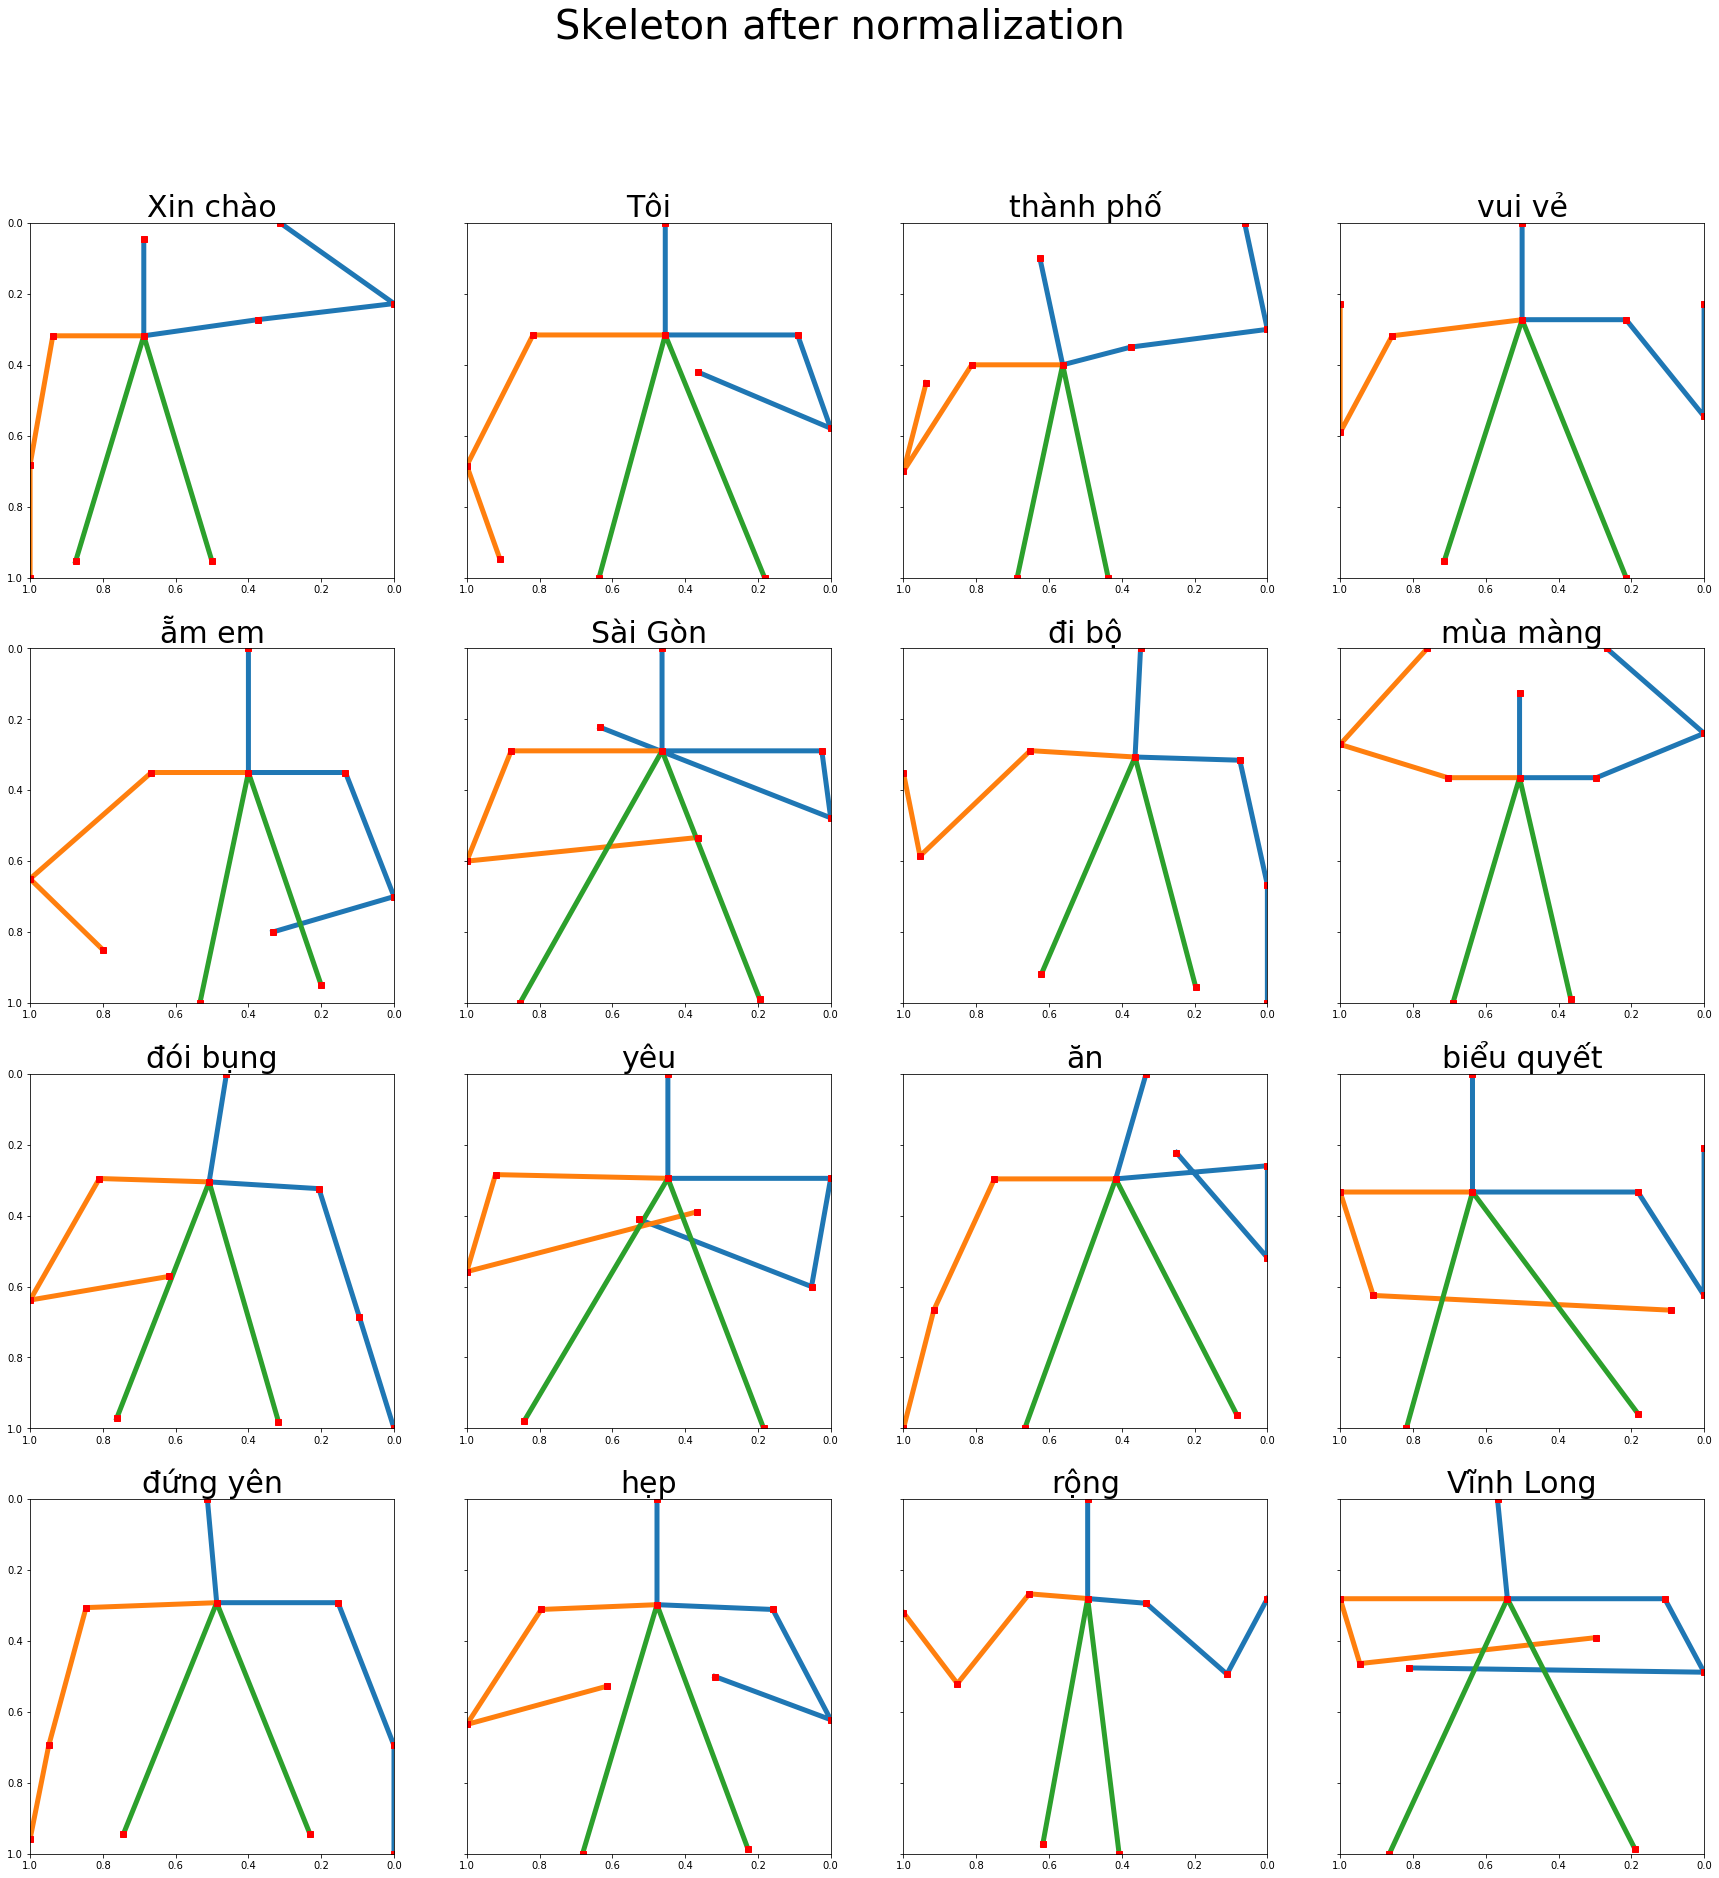

In [43]:
# Plot skeleton after normalize
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']

fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False,
                             sharey=True, figsize=(30,30))
fig.suptitle('Skeleton after normalization', size=40)
n = 0
for x in range(4):
    for y in range(4):
        a = list(X_pp[n*800+100])
        axes[x,y].set_title(class_names[n], size=30)
        axes[x,y].plot([a[0],a[2],a[4],a[6],a[8]], [a[1],a[3],a[5],a[7],a[9]], linewidth=5)
        axes[x,y].plot([a[2],a[10],a[12],a[14]], [a[3],a[11],a[13],a[15]], linewidth=5)
        axes[x,y].plot([a[16],a[2],a[18]], [a[17],a[3],a[19]], linewidth=5)
        axes[x,y].plot([a[0], a[2], a[4], a[6], a[8], a[10], a[12], a[14], a[16], a[18]], [a[1], a[3], a[5], a[7], a[9], a[11], a[13], a[15], a[17], a[19]], 'rs', )
        axes[x,y].axis([1, 0, 1, 0])
        n+=1
plt.show()

In [94]:
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)
matrix_Y = np_utils.to_categorical(encoder_Y)

In [95]:
print(X_pp.shape)
print(Y.shape)
print(matrix_Y.shape)
print(matrix_Y)

(12800, 20)
(12800,)
(12800, 16)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [96]:
print(Y[0], ": ", encoder_Y[0])
print(Y[800], ": ", encoder_Y[800])
print(Y[1600], ": ", encoder_Y[1600])
print(Y[2400], ": ", encoder_Y[2400])
print(Y[3200], ": ", encoder_Y[3200])
print(Y[4000], ": ", encoder_Y[4000])
print(Y[4800], ": ", encoder_Y[4800])
print(Y[5600], ": ", encoder_Y[5600])
print(Y[6400], ": ", encoder_Y[6400])
print(Y[7200], ": ", encoder_Y[7200])
print(Y[8000], ": ", encoder_Y[8000])
print(Y[8800], ": ", encoder_Y[8800])
print(Y[9600], ": ", encoder_Y[9600])
print(Y[10400], ": ", encoder_Y[10400])
print(Y[11200], ": ", encoder_Y[11200])
print(Y[12000], ": ", encoder_Y[12000])

0.0 :  0
1.0 :  1
2.0 :  2
3.0 :  3
4.0 :  4
5.0 :  5
6.0 :  6
7.0 :  7
8.0 :  8
9.0 :  9
10.0 :  10
11.0 :  11
12.0 :  12
13.0 :  13
14.0 :  14
15.0 :  15


In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pp, matrix_Y, test_size=0.5)  #random_state=42

In [155]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<ipython-input-44-d06dcff44ad8> in <module>
----> 1 his.loss_plot('epoch')

<ipython-input-35-ae441bd5a7b4> in loss_plot(self, loss_type)
     19 
     20     def loss_plot(self, loss_type):
---> 21         iters = range(len(self.losses[loss_type]))
     22         plt.figure()
     23         # acc

AttributeError: 'LossHistory' object has no attribute 'losses'

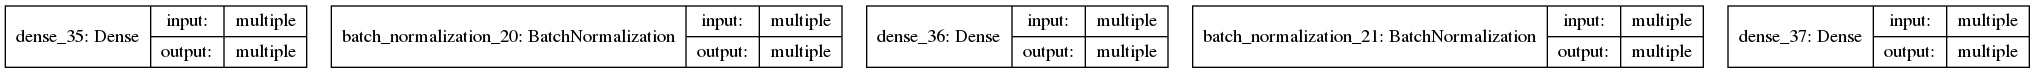

In [156]:
model = Sequential()
# model.add(Dense(units=128, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='softmax'))
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['acc'])
plot_model(model, to_file='model.png', show_shapes=True)

In [157]:
checkpoint = ModelCheckpoint('sign_language_16.h5', monitor='val_acc', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False, period=1)
history = model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks = [checkpoint])
model.save('sign_language_16.h5')

Train on 10240 samples, validate on 2560 samples
Epoch 1/50
10240/10240 [==============================] - 1s 117us/step - loss: 2.0821 - acc: 0.3798 - val_loss: 2.1525 - val_acc: 0.4832

Epoch 00001: val_acc improved from -inf to 0.48320, saving model to sign_language_16.h5
Epoch 2/50
10240/10240 [==============================] - 0s 49us/step - loss: 1.1143 - acc: 0.7827 - val_loss: 0.9828 - val_acc: 0.8832

Epoch 00002: val_acc improved from 0.48320 to 0.88320, saving model to sign_language_16.h5
Epoch 3/50
10240/10240 [==============================] - 0s 48us/step - loss: 0.7454 - acc: 0.9120 - val_loss: 0.5871 - val_acc: 0.9602

Epoch 00003: val_acc improved from 0.88320 to 0.96016, saving model to sign_language_16.h5
Epoch 4/50
10240/10240 [==============================] - 1s 52us/step - loss: 0.5390 - acc: 0.9583 - val_loss: 0.4191 - val_acc: 0.9738

Epoch 00004: val_acc improved from 0.96016 to 0.97383, saving model to sign_language_16.h5
Epoch 5/50
10240/10240 [=============

10240/10240 [==============================] - 1s 51us/step - loss: 0.0088 - acc: 0.9982 - val_loss: 0.0108 - val_acc: 0.9988

Epoch 00040: val_acc did not improve from 0.99883
Epoch 41/50
10240/10240 [==============================] - 1s 71us/step - loss: 0.0083 - acc: 0.9987 - val_loss: 0.0110 - val_acc: 0.9984

Epoch 00041: val_acc did not improve from 0.99883
Epoch 42/50
10240/10240 [==============================] - 0s 48us/step - loss: 0.0091 - acc: 0.9980 - val_loss: 0.0107 - val_acc: 0.9984

Epoch 00042: val_acc did not improve from 0.99883
Epoch 43/50
10240/10240 [==============================] - 1s 64us/step - loss: 0.0090 - acc: 0.9981 - val_loss: 0.0120 - val_acc: 0.9984

Epoch 00043: val_acc did not improve from 0.99883
Epoch 44/50
10240/10240 [==============================] - 1s 59us/step - loss: 0.0074 - acc: 0.9988 - val_loss: 0.0101 - val_acc: 0.9988

Epoch 00044: val_acc did not improve from 0.99883
Epoch 45/50
10240/10240 [==============================] - 1s 50us/

In [158]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 64)                1344      
_________________________________________________________________
batch_normalization_20 (Batc (None, 64)                256       
_________________________________________________________________
dense_36 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32)                128       
_________________________________________________________________
dense_37 (Dense)             (None, 16)                528       
Total params: 4,336
Trainable params: 4,144
Non-trainable params: 192
_________________________________________________________________


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


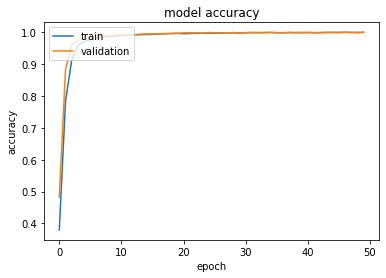

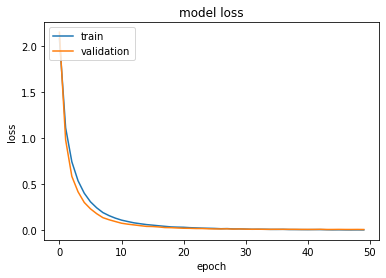

In [159]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [160]:
model = load_model('sign_language_16.h5')

In [174]:
Y_pred = model.predict(X_test)

In [175]:
print(X_test)

[[0.37 0.   0.44 ... 0.95 0.56 1.  ]
 [0.48 0.   0.48 ... 1.   0.71 0.99]
 [0.49 0.   0.47 ... 1.   0.73 0.99]
 ...
 [0.53 0.   0.47 ... 1.   0.63 0.97]
 [0.5  0.1  0.49 ... 1.   0.67 0.98]
 [0.39 0.   0.39 ... 1.   0.56 1.  ]]


In [176]:
print(Y_pred)

[[4.18e-06 3.46e-05 2.14e-06 ... 8.54e-05 3.01e-06 1.03e-07]
 [2.86e-06 9.17e-06 4.49e-06 ... 7.59e-07 5.49e-06 7.09e-07]
 [4.63e-06 5.85e-06 2.03e-07 ... 1.00e+00 4.50e-05 3.86e-07]
 ...
 [3.89e-06 8.20e-06 5.18e-06 ... 8.16e-06 9.04e-06 4.14e-08]
 [8.51e-06 1.56e-06 5.37e-05 ... 2.85e-07 1.23e-05 1.33e-05]
 [2.19e-06 3.10e-06 8.52e-07 ... 1.89e-05 1.07e-06 3.56e-07]]


In [177]:
print(Y_pred.shape)

(6400, 16)


In [178]:
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [179]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=40)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize = 30)
    plt.yticks(tick_marks, classes, fontsize = 30)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 25)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 25)
    plt.xlabel('Predicted label', fontsize = 25)

In [180]:
cfm = confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(Y_pred, axis=1))

In [181]:
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[397   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 401   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 421   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 417   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 400   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 389   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 404   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 394   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 391   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 380   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 403   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 413   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 391   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 400   0   0]
 [  0   0   0   0   0 

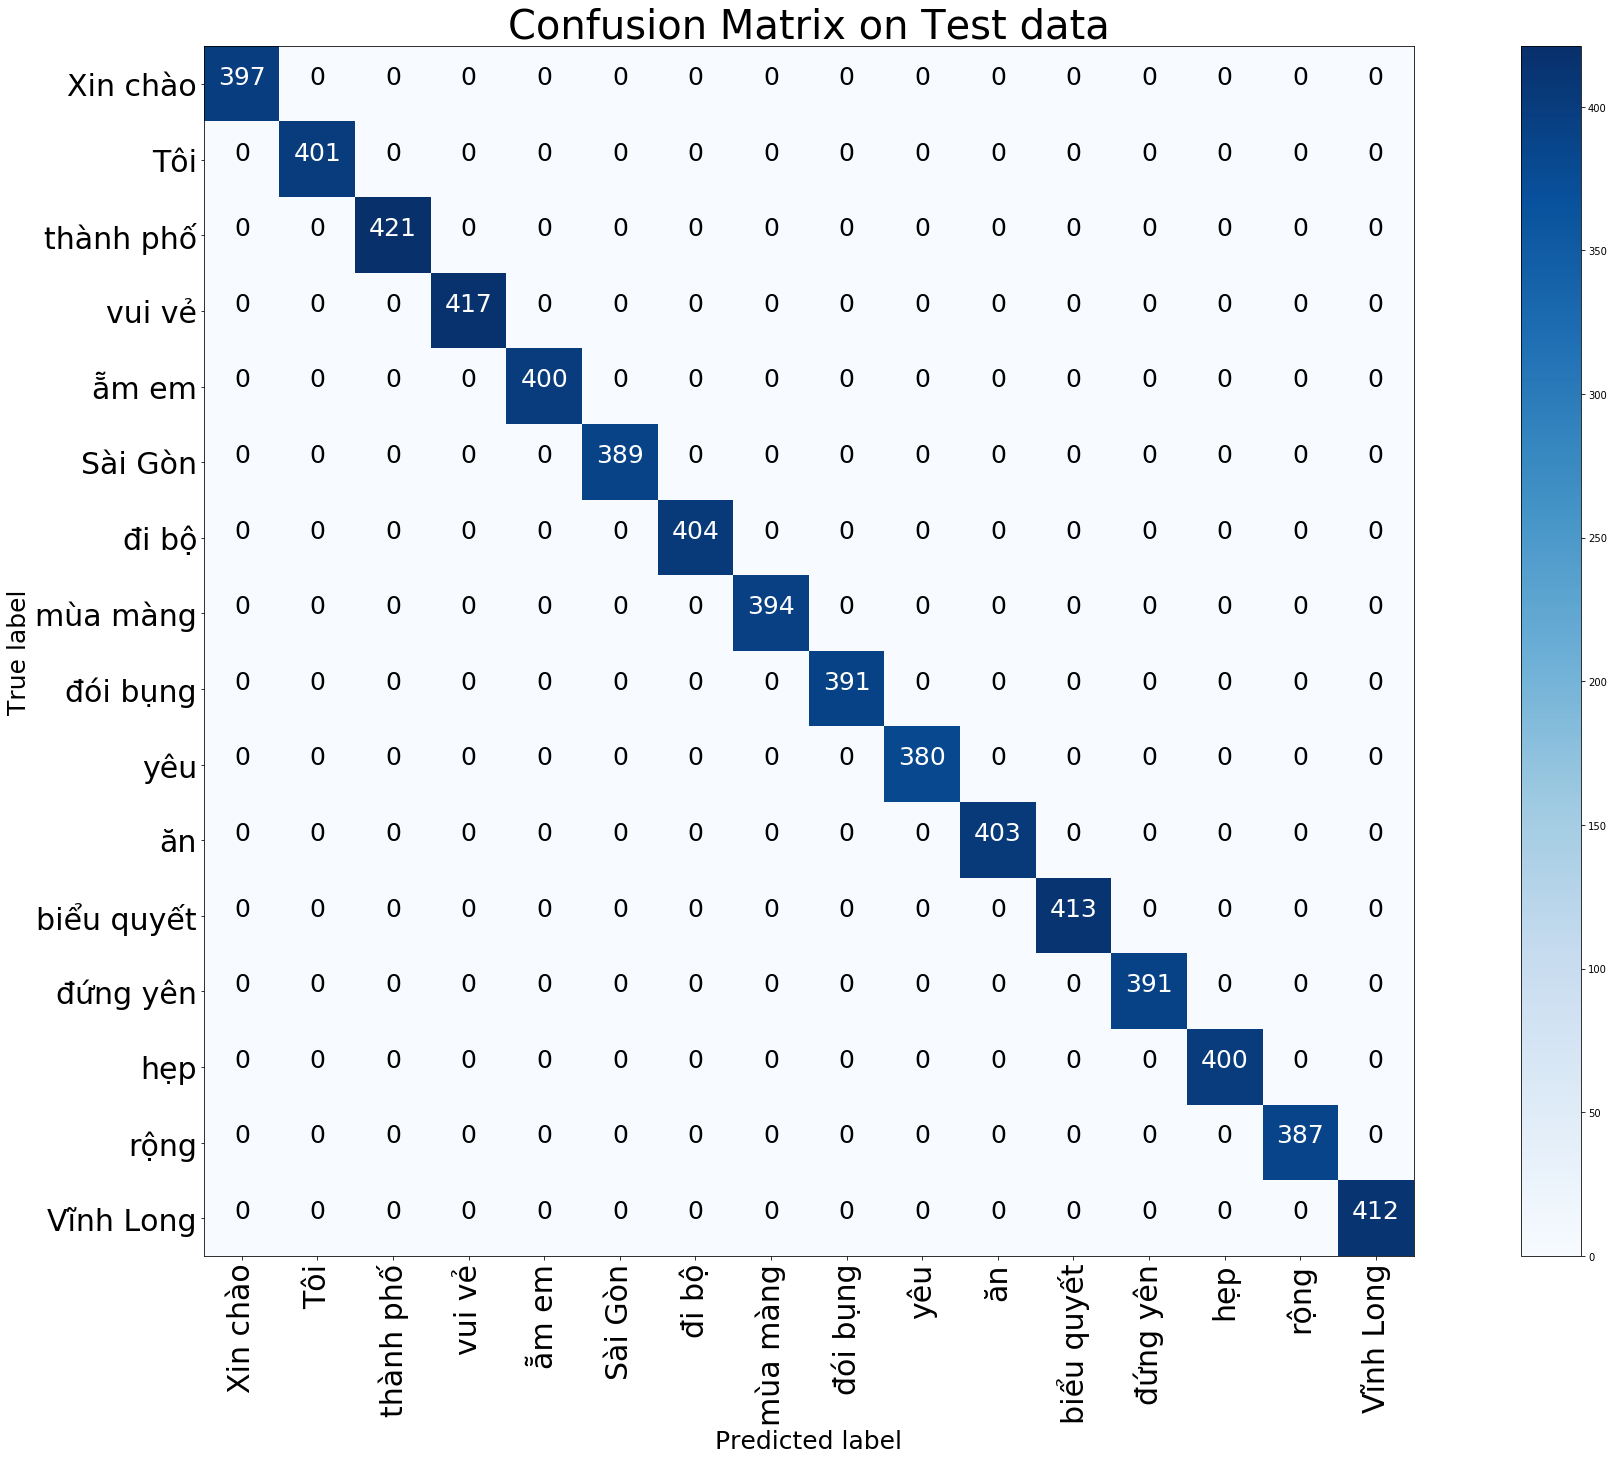

In [182]:
plt.figure(figsize=(30,20))
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']
plot_confusion_matrix(cfm, classes=class_names, title='Confusion Matrix on Test data')
plt.show()

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pp, matrix_Y, test_size=0.5)

In [7]:
model = load_model('sign_language_16_test.h5')
Y_pred = model.predict(X_test)

In [18]:
print(Y_pred)

[[1.77017432e-06 3.04516084e-06 6.29508795e-05 ... 1.04193576e-04
  9.99652863e-01 1.59954868e-06]
 [6.31410967e-06 8.18462740e-06 2.68270469e-05 ... 1.10982495e-04
  8.64739746e-09 2.66569532e-06]
 [1.87454512e-04 7.53061101e-07 2.25264957e-05 ... 2.77808522e-05
  2.66659554e-05 2.61828905e-06]
 ...
 [1.25825659e-06 2.47641165e-05 1.93592696e-05 ... 6.16290117e-06
  2.94854017e-05 4.41152042e-05]
 [1.71835331e-04 2.31213704e-07 1.09209086e-05 ... 1.56128954e-05
  6.87733382e-06 1.90260062e-06]
 [9.57213615e-07 2.51408619e-06 1.26425721e-06 ... 9.99866724e-01
  9.96401195e-06 6.55903918e-08]]


In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuGn):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 4.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

y_true = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
                    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 
                    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 
                    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
                    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
                    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
                    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 
                    ])
y_pred = np.array([ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                    3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 
                    4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 
                    5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 
                    6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 
                    7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 
                    8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
                    9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
                    10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                    11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
                    12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
                    13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                    14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
                    15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 
                    ])
cnf_matrix = confusion_matrix(y_true, y_pred)

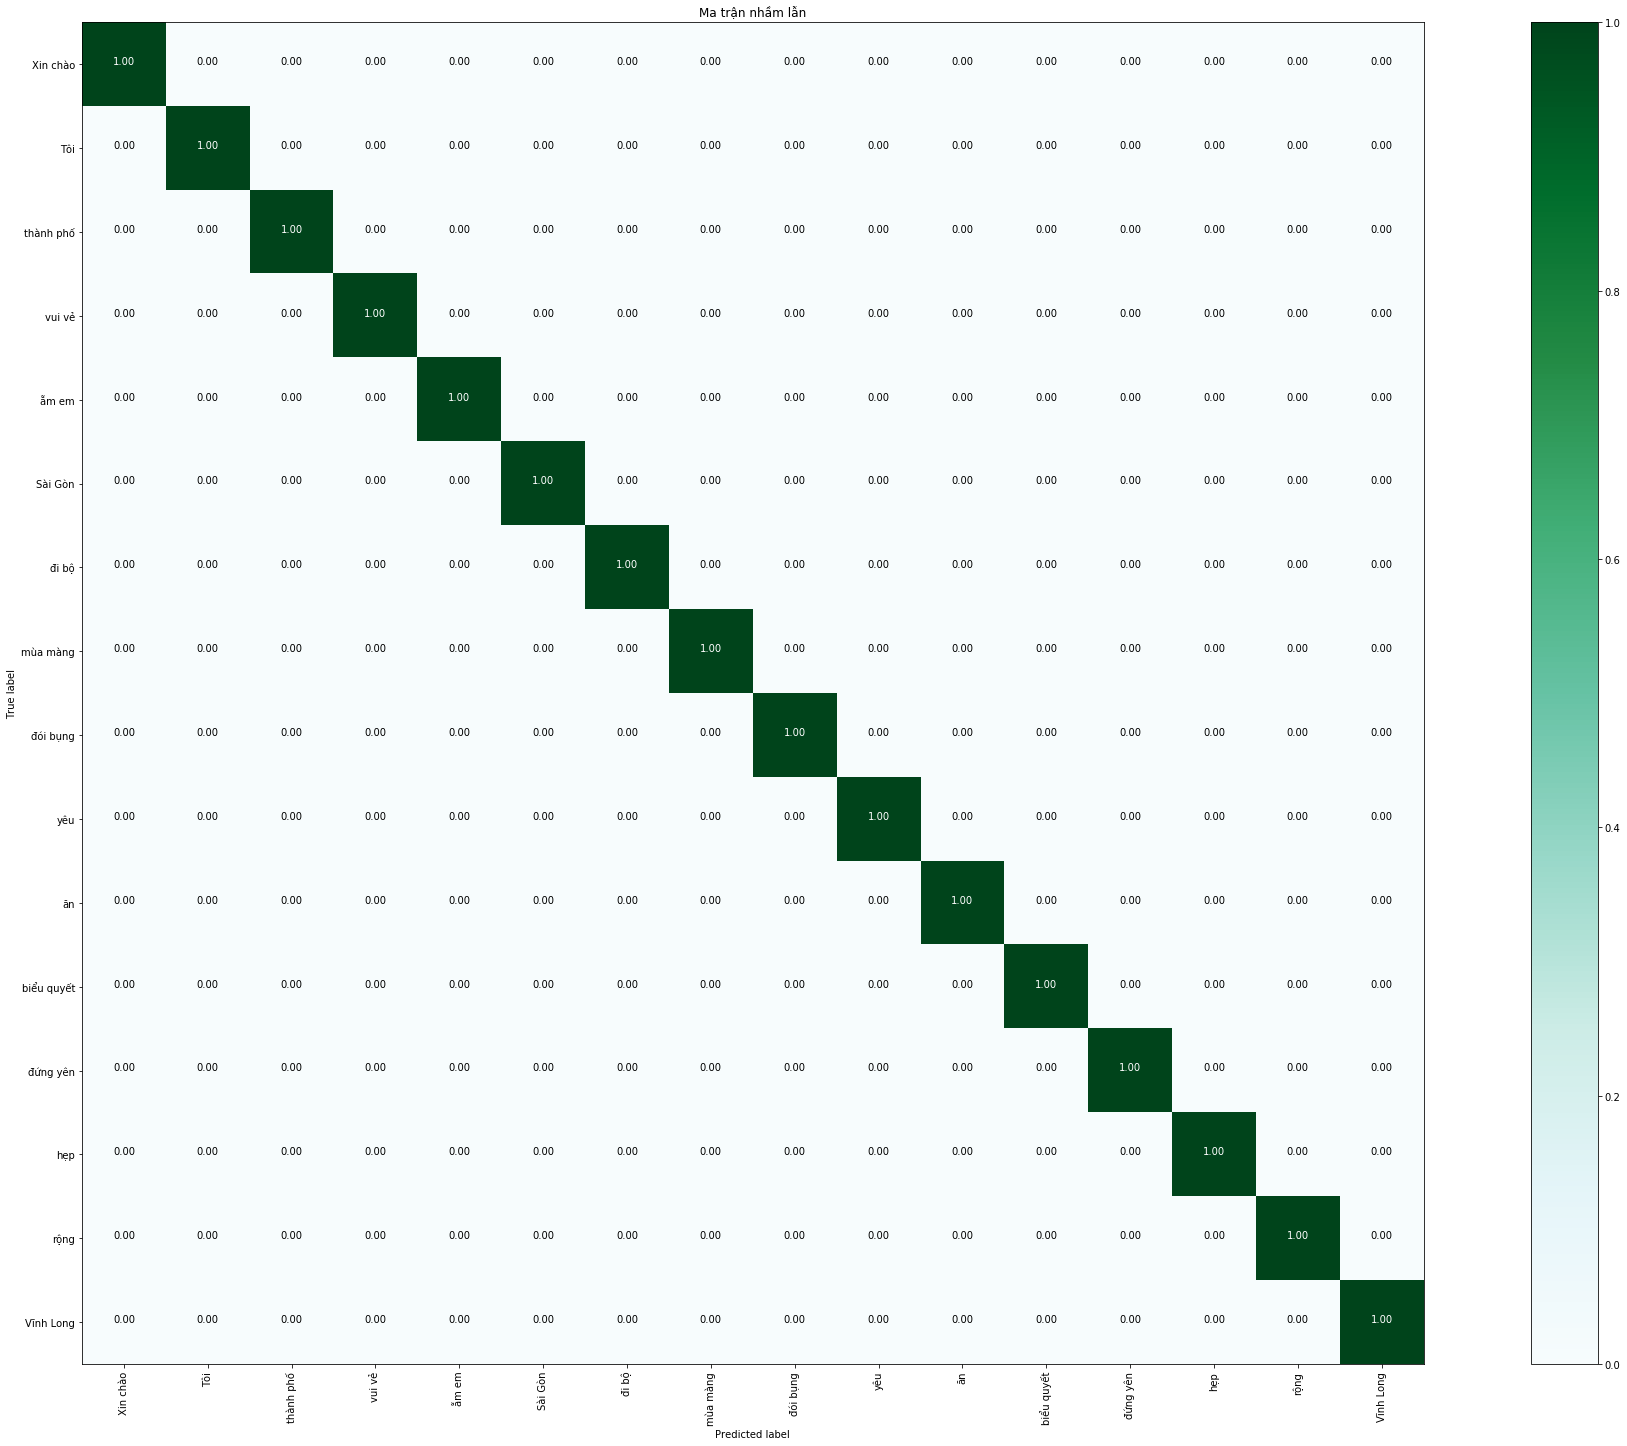

In [21]:
class_names = ['Xin chào', 'Tôi', 'thành phố', 'vui vẻ', 'ẵm em', 'Sài Gòn', 
               'đi bộ', 'mùa màng', 'đói bụng', 'yêu', 'ăn', 'biểu quyết', 
               'đứng yên', 'hẹp', 'rộng', 'Vĩnh Long']
#                0      1      2       3                4           5          6         7          8           9          
plt.figure(figsize=(30,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Ma trận nhầm lẫn')

plt.show()